In [1]:
import numpy as np
import scipy.ndimage as ndimage
from scipy import optimize
import matplotlib.pyplot as plt
import cv2

In [2]:
def ncc(arr1, arr2):
    """ Compute the normalized cross-correlation metric """
    x = min(arr1.shape[0], arr2.shape[0])
    y = min(arr1.shape[1], arr2.shape[1])

    arr1_cropped = arr1[:x, :y]
    arr2_cropped = arr2[:x, :y]

    arr1_mean = arr1_cropped.mean()
    arr2_mean = arr2_cropped.mean()

    numerator = np.sum((arr1_cropped - arr1_mean) * (arr2_cropped - arr2_mean))
    denominator = np.sqrt(np.sum((arr1_cropped - arr1_mean) ** 2) * np.sum((arr2_cropped - arr2_mean) ** 2))

    return numerator / denominator

In [3]:
def apply_rotation(angle, img):
    # Compute the center of the image
    center = (img.shape[1] // 2, img.shape[0] // 2)

    # Rotate the image around its center
    rotated_img = ndimage.rotate(img, angle, reshape=False, order=1, mode='constant', cval=0.0)

    return rotated_img


In [4]:
def cost_ncc(param, reference_image, target_image):
    transformed = apply_rotation(param[0], target_image)
    cost = -ncc(reference_image, transformed)  # Negate NCC because we want to maximize it
    print("Param", param, "cost", cost)
    return cost


In [5]:
# Load images using OpenCV
static = cv2.imread('brain.png', cv2.IMREAD_GRAYSCALE)
moving = cv2.imread('distorted.png', cv2.IMREAD_GRAYSCALE)

# Ensure the images are loaded properly
if static is None or moving is None:
    raise ValueError("One or both images could not be loaded.")

In [6]:
initial = [0]  # Initial guess for the rotation angle in degrees

def trying_params(params):
    """ Callback function """
    print("trying_params: " + str(params))

best_params = optimize.fmin_powell(cost_ncc, initial, args=(static, moving), callback=trying_params)
best_angle = best_params[0]  # Extract the scalar angle value
print("Best params", best_angle)

Param [0] cost -0.7711294765153228
Param [0.] cost -0.7711294765153228
Param [1.] cost -0.7807672349090627
Param [2.618034] cost -0.7894996879831361
Param [3.47490399] cost -0.7927761605374386
Param [4.86134877] cost -0.7984959646872004
Param [7.10466356] cost -0.8117789492274458
Param [10.73442316] cost -0.832486717098164
Param [86.42756511] cost -0.5101892215961062
Param [39.64662982] cost -0.7758129953946191
Param [21.77790309] cost -0.9278162930587122
Param [23.53715847] cost -0.8844999224073202
Param [17.9178456] cost -0.9177169229836527
Param [20.30349237] cost -0.9883051075207954
Param [19.91938498] cost -0.9980385245584362
Param [19.15486499] cost -0.9655528119261507
Param [19.72019113] cost -0.9893610933305497
trying_params: [19.91938498]
Param [39.83876997] cost -0.7742518401648988
Param [19.91938498] cost -0.9980385245584362
Param [39.83876997] cost -0.7742518401648988
Param [-12.31085718] cost -0.7028446890710653
Param [7.60852831] cost -0.8151857529553524
Param [27.5279127

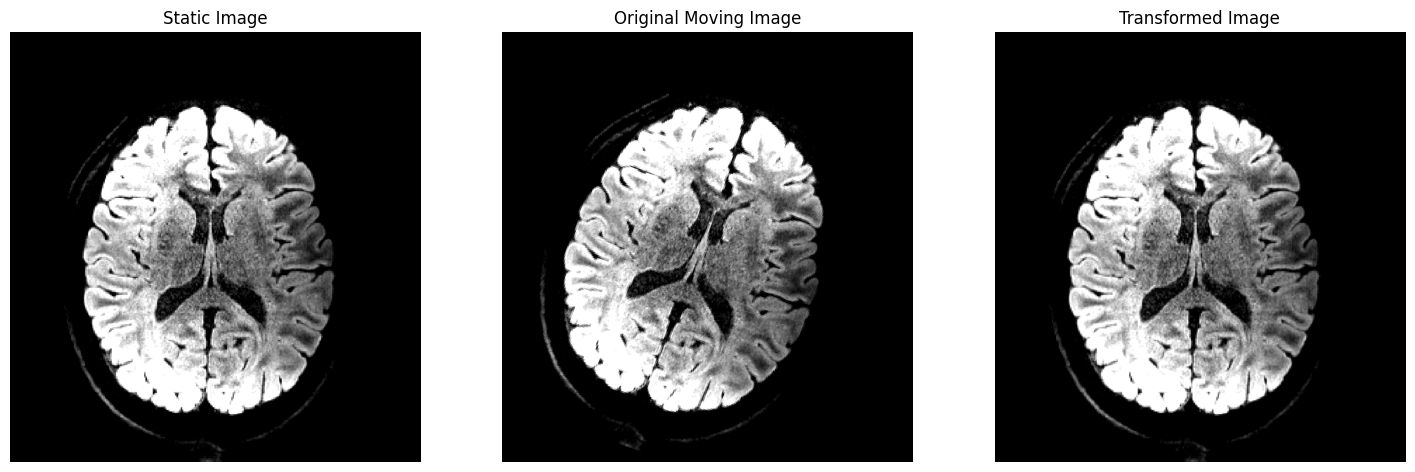

In [7]:
# Apply the best rotation angle to the moving image
transformed1 = apply_rotation(best_angle, moving)

# Function to plot three images side by side
def plot_three_images(img1, img2, img3, title1='Static Image', title2='Original Moving Image', title3='Transformed Image'):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img3, cmap='gray')
    plt.title(title3)
    plt.axis('off')
    plt.show()

# Plot the static, original moving, and transformed images
plot_three_images(static, moving, transformed1, title1='Static Image', title2='Original Moving Image', title3='Transformed Image')
